In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import numpy as np

from gensim.models.word2vec import Word2Vec
import gensim.downloader as api  

In [3]:
# download the corpus
# text8: English Wikipedia data (10^8 bytes)
corpus = api.load('text8')

[==================================================] 100.0% 31.6/31.6MB downloaded


In [0]:
# train a model from the corpus
# default: CBOW, sg=1: skipgram
model = Word2Vec(corpus, workers=4) 
#model = Word2Vec(corpus, sg=1, workers=4) 

In [12]:
# print the embedding of 'car'
model.wv['car']

array([-0.19271015,  0.2947109 ,  0.26240042, -0.11746864,  0.02403713,
        0.03372288, -0.01205535, -0.11594929,  0.07004239, -0.49272496,
       -0.40991032, -0.46955174, -0.13407601,  0.5386038 , -0.60111153,
       -0.49016643,  0.04878402,  0.07511827, -0.9239266 , -0.3403152 ,
        0.5934131 ,  0.42133412,  0.2846355 ,  0.04110036, -0.25852746,
        0.26966712,  0.03940986, -0.61947745, -0.31362316, -0.13043888,
        0.05058933, -0.28808004, -0.17712095,  0.02400458,  0.5170358 ,
        0.40506473, -0.13970332, -0.79444647, -0.01659149,  0.0263262 ,
        0.43427056,  0.13043287, -0.4674013 ,  0.17639084,  0.08023553,
       -0.15823348, -0.01084607,  0.39199346,  0.1155061 ,  0.03743769,
       -0.03166484, -0.09299597, -0.19421741,  0.4506015 , -0.36929098,
        0.13572857,  0.35833225,  0.01233987,  0.3626677 , -0.15016997,
       -0.14513955,  0.03761166,  0.25589463, -0.09847634,  0.11605775,
       -0.47425953, -0.01198895,  0.18826942, -0.41326436,  0.01

In [50]:
# print the 10 most similar words of 'car' based on cosine similarity
output = model.wv.most_similar('car')
output = np.array(output)

print(output)

KeyError: ignored

In [28]:
# print the similairty between two words
print('car', '- driver:', model.wv.similarity('car', 'driver'))
print('car', '- water:', model.wv.similarity('car', 'water'))
print('fish', '- water:', model.wv.similarity('fish', 'water'))

car - driver: 0.8410565
car - water: 0.09772907
fish - water: 0.5570563


In [0]:
# save and reload the model
model.save('newmodel')
model = Word2Vec.load('newmodel')

In [16]:
vector = model.wv['woman'] - model.wv['man'] + model.wv['king']
output = model.wv.similar_by_vector(vector)
output = np.array(output)

print(output)

[['king' '0.7981221079826355']
 ['matilda' '0.7001627683639526']
 ['queen' '0.6858646869659424']
 ['viii' '0.6744378805160522']
 ['jadwiga' '0.6741787791252136']
 ['alexandra' '0.6693809032440186']
 ['canute' '0.6685507893562317']
 ['dowager' '0.6680349111557007']
 ['daughter' '0.665277361869812']
 ['throne' '0.6614315509796143']]


In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [0]:
# train words whose frequency > 3000 
model = Word2Vec(corpus, min_count=3000, workers=4)

In [55]:
# print how many words are trained
len(model.wv.vocab)

550

In [0]:
# keys: a list of trained words
keys = list(model.wv.vocab.keys())
# X: a list of word vectors
X = model.wv[keys]

# apply tsne to project X into 2d space
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

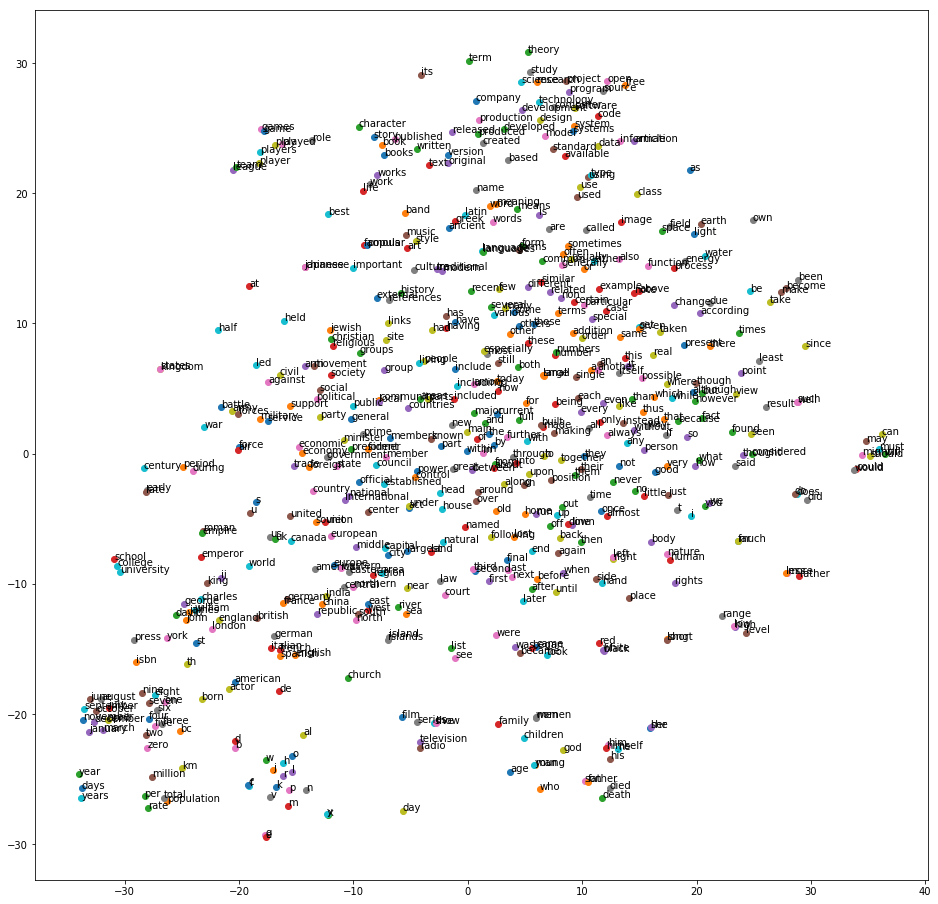

In [57]:
# plot on the 2d space
plt.figure(figsize=(16, 16)) 
for i in range(len(X)):
  plt.scatter(X_tsne[i, 0], X_tsne[i, 1])
  plt.annotate(keys[i], xy=(X_tsne[i, 0], X_tsne[i, 1]))
plt.show()